In [1]:
### importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
# loading the dataset
pima = pd.read_csv("PimaDiabetes.csv")
Topredict = pd.read_csv("ToPredict.csv")


In [3]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,3.844000,120.737333,68.982667,20.489333,80.378667,31.959067,0.473544,33.166667,0.346667
std,3.370085,32.019671,19.508814,15.918828,115.019198,7.927399,0.332119,11.708872,0.476226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.750000,36.575000,0.628500,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       750 non-null    int64  
 1   Glucose           750 non-null    int64  
 2   BloodPressure     750 non-null    int64  
 3   SkinThickness     750 non-null    int64  
 4   Insulin           750 non-null    int64  
 5   BMI               750 non-null    float64
 6   DiabetesPedigree  750 non-null    float64
 7   Age               750 non-null    int64  
 8   Outcome           750 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.9 KB


In [5]:
# making a copy of the data and replace values
# Replacing the 0 in Glucose, BloodPressure, SkinThickness, Insulin and BMI
# columns with NaN
pima_copy = pima.copy(deep=True)
pima_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=pima_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [6]:
print(pima_copy.isnull().sum())

Pregnancies           0
Glucose               5
BloodPressure        35
SkinThickness       221
Insulin             362
BMI                  11
DiabetesPedigree      0
Age                   0
Outcome               0
dtype: int64


In [7]:
# this loop shows the completeness in % for the missing values columns
# this will help in seeing what to do with missing values, such as, impute it
# or remove it, etc.
for i in pima_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]:
 print (i,':',(pima_copy[i].isnull().sum()),'\npercentage:',
        ((pima_copy[i].count())/(len(pima_copy[i]))*100),'\n'
 )

Glucose : 5 
percentage: 99.33333333333333 

BloodPressure : 35 
percentage: 95.33333333333334 

SkinThickness : 221 
percentage: 70.53333333333333 

Insulin : 362 
percentage: 51.733333333333334 

BMI : 11 
percentage: 98.53333333333333 



<Axes: >

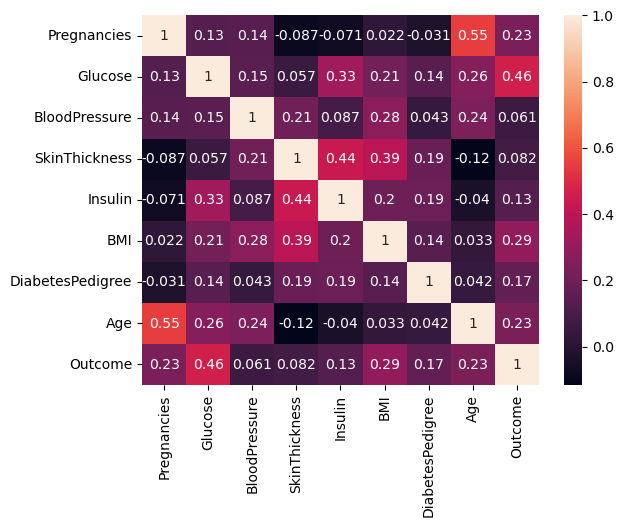

In [8]:
# originas dataset

#Correlation:
pima_corr= pima.corr()
sns.heatmap(pima_corr,annot=True)

<Axes: >

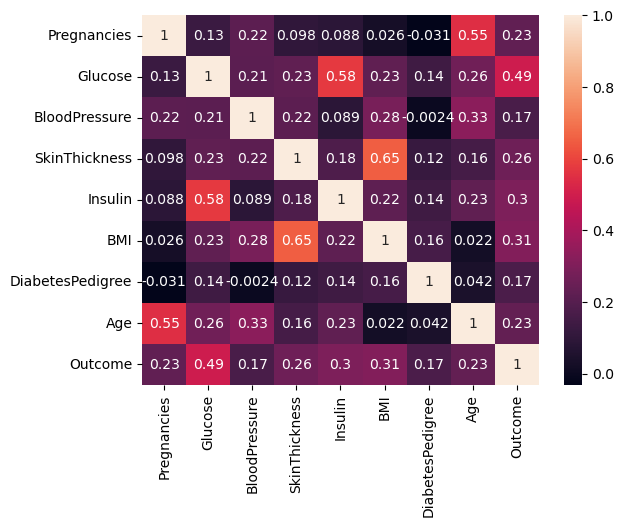

In [9]:
# copied dataset with NaN values

#Correlation:
pima_corr= pima_copy.corr()
sns.heatmap(pima_corr,annot=True)

In [10]:
# dropping column insulin
pima_copy.drop('Insulin', inplace = True,axis = 1)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigree'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>, <Axes: >]], dtype=object)

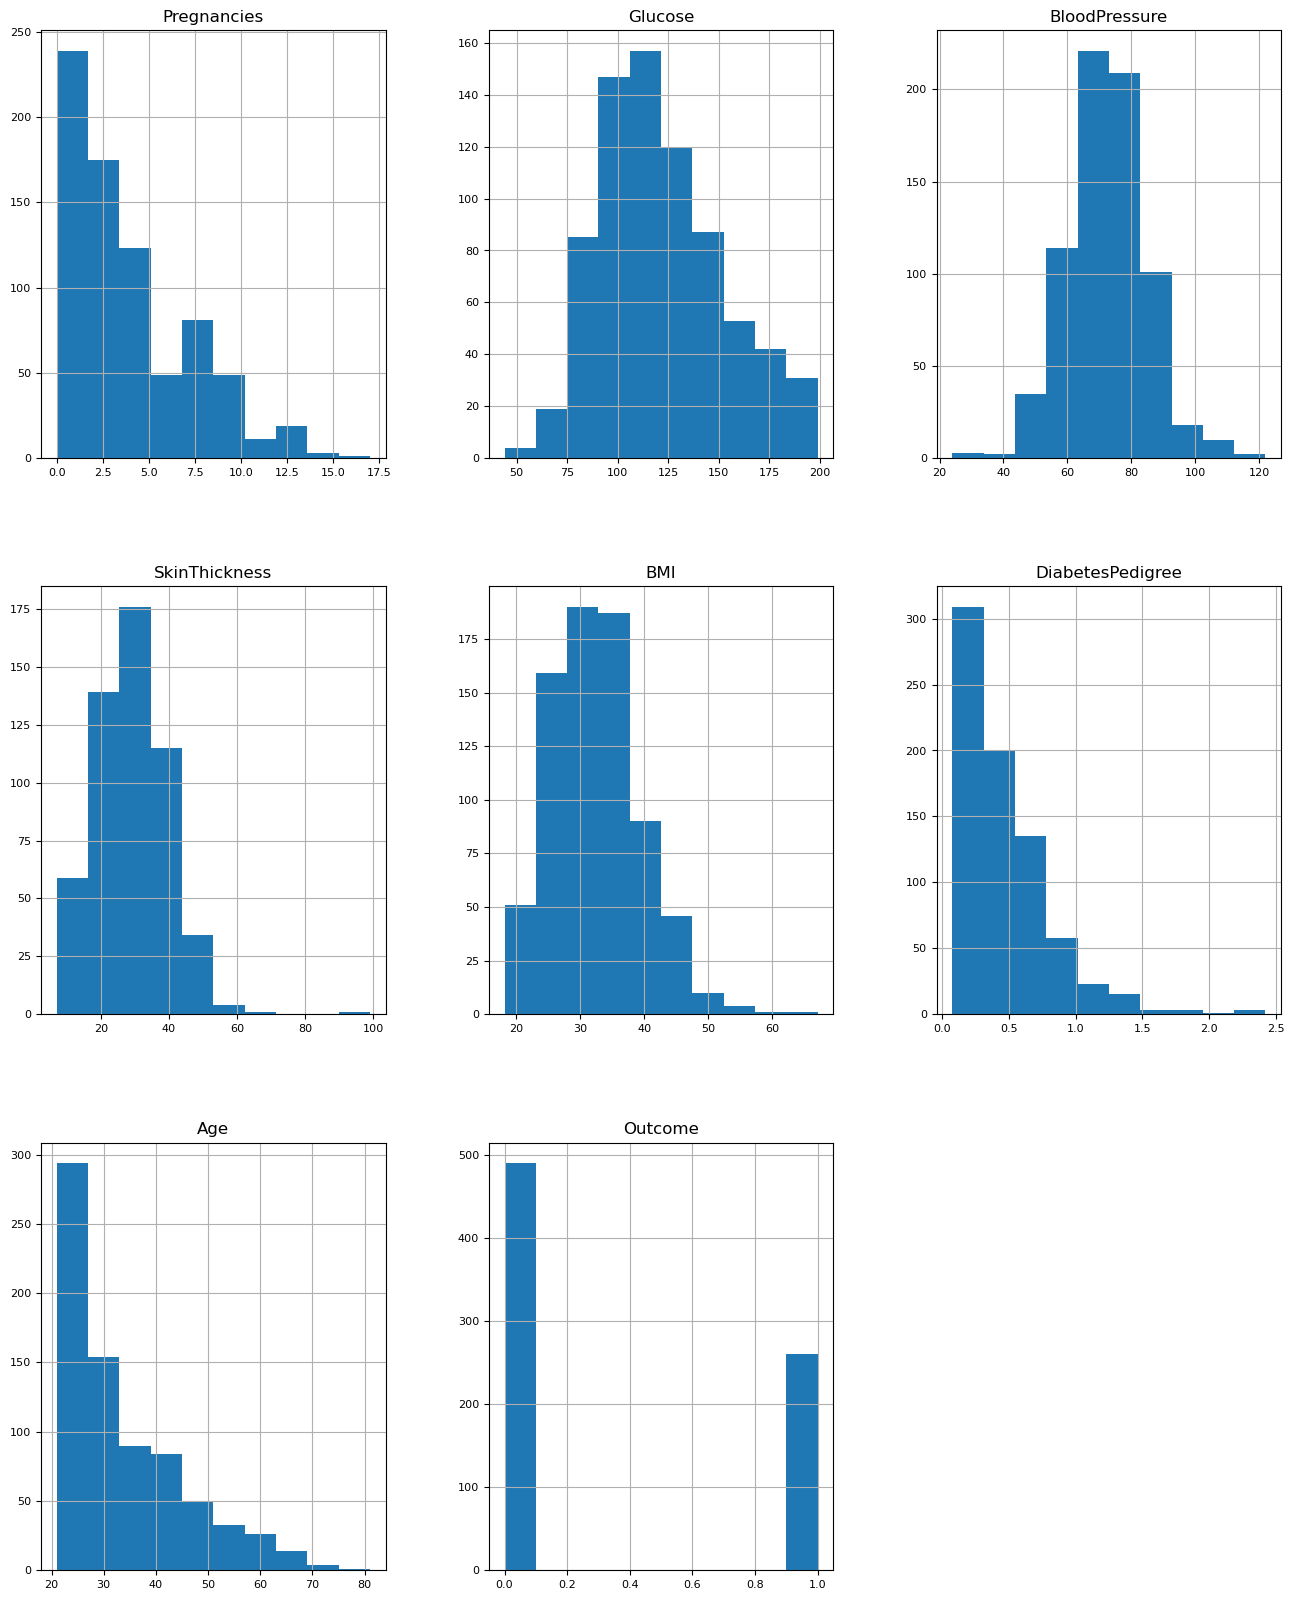

In [11]:
#Histogram of all columns in the dataset:
pima_copy.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8)

In [12]:
# filling in missing values with median by grouping based on 'Outcome'
for i in pima_copy.columns:
    pima_copy[i] = pima_copy[i].fillna(pima_copy.groupby('Outcome')[i].transform('median'))

In [13]:
print(pima_copy.isnull().sum())

Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64


In [14]:
pima_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigree,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,32.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


In [15]:
pima_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigree,Age,Outcome
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,3.844000,121.538667,72.345333,29.005333,32.411600,0.473544,33.166667,0.346667
std,3.370085,30.480320,12.148368,8.918110,6.906074,0.332119,11.708872,0.476226
min,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,36.575000,0.628500,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigree'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>, <Axes: >]], dtype=object)

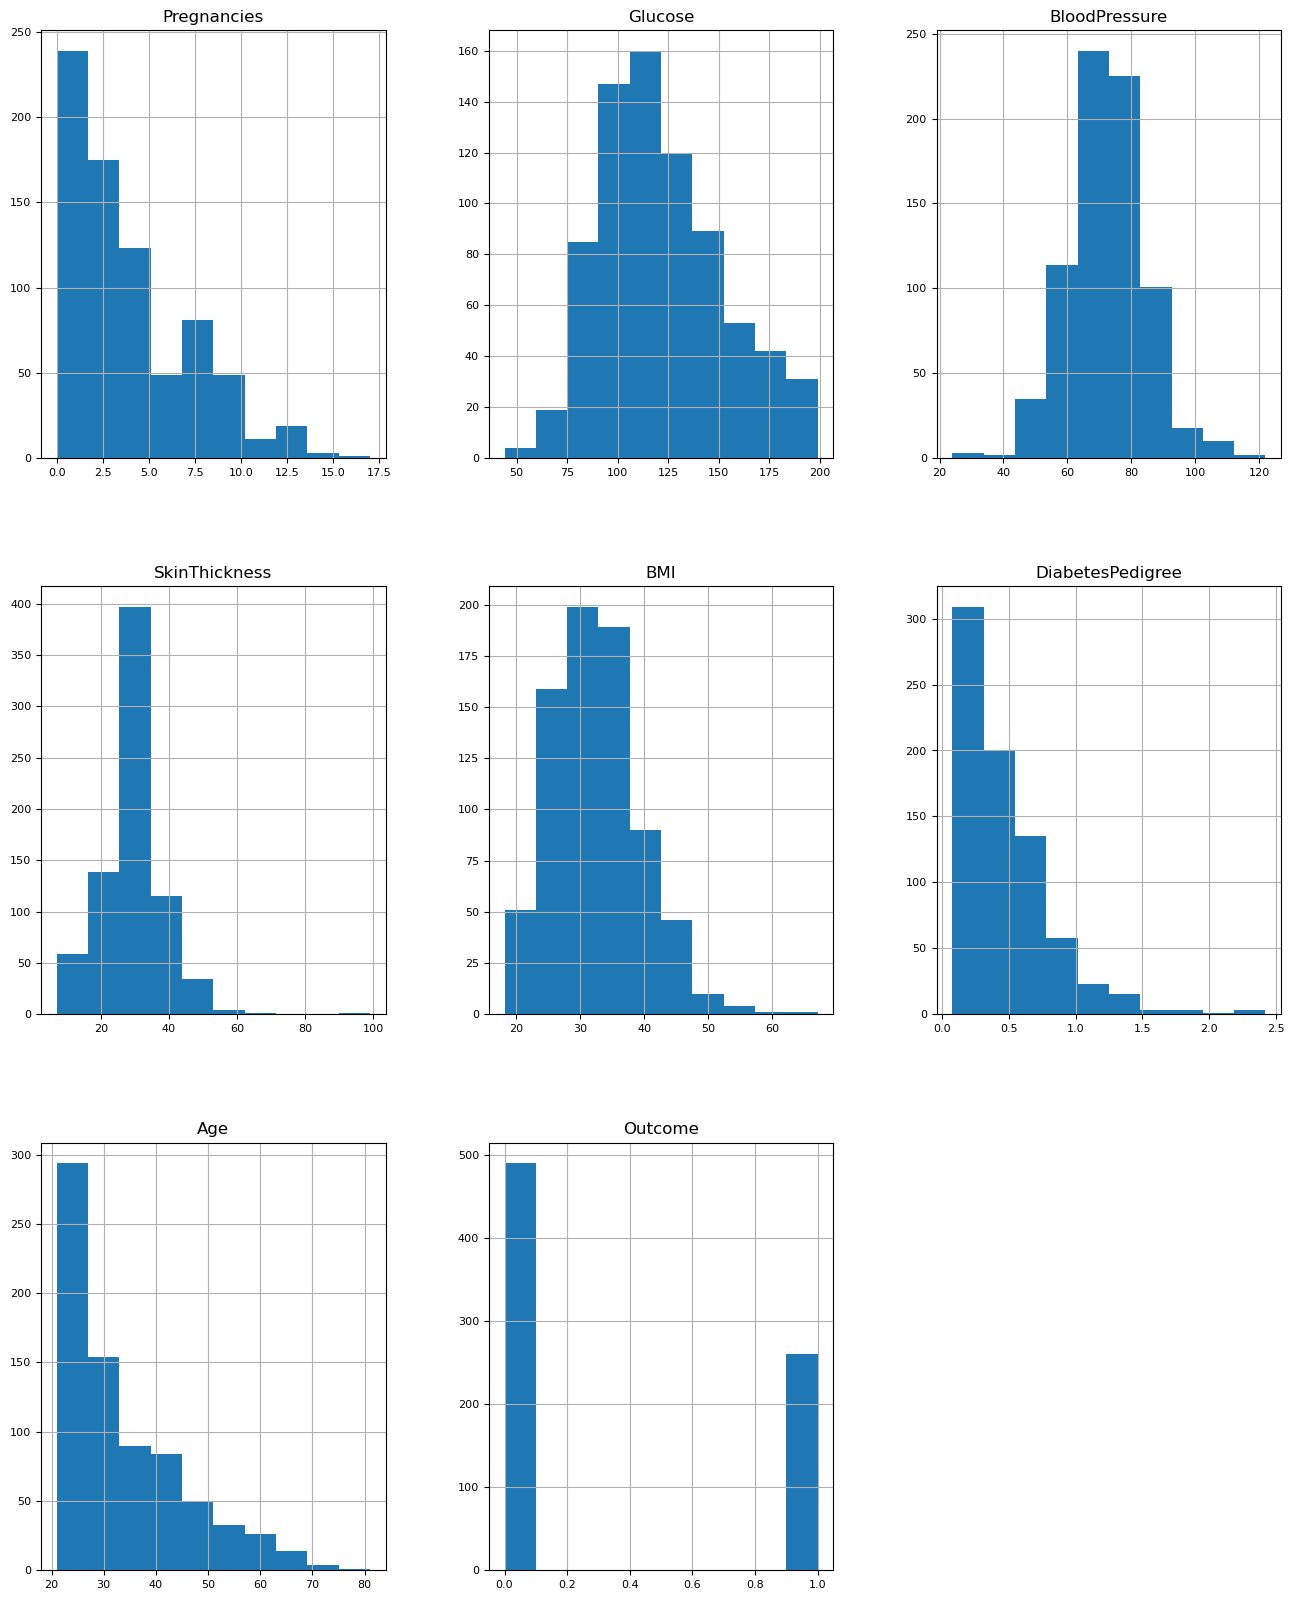

In [16]:
#Histogram of all columns in the dataset after missing values:
pima_copy.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8)

#### Histogram and KDE Plots

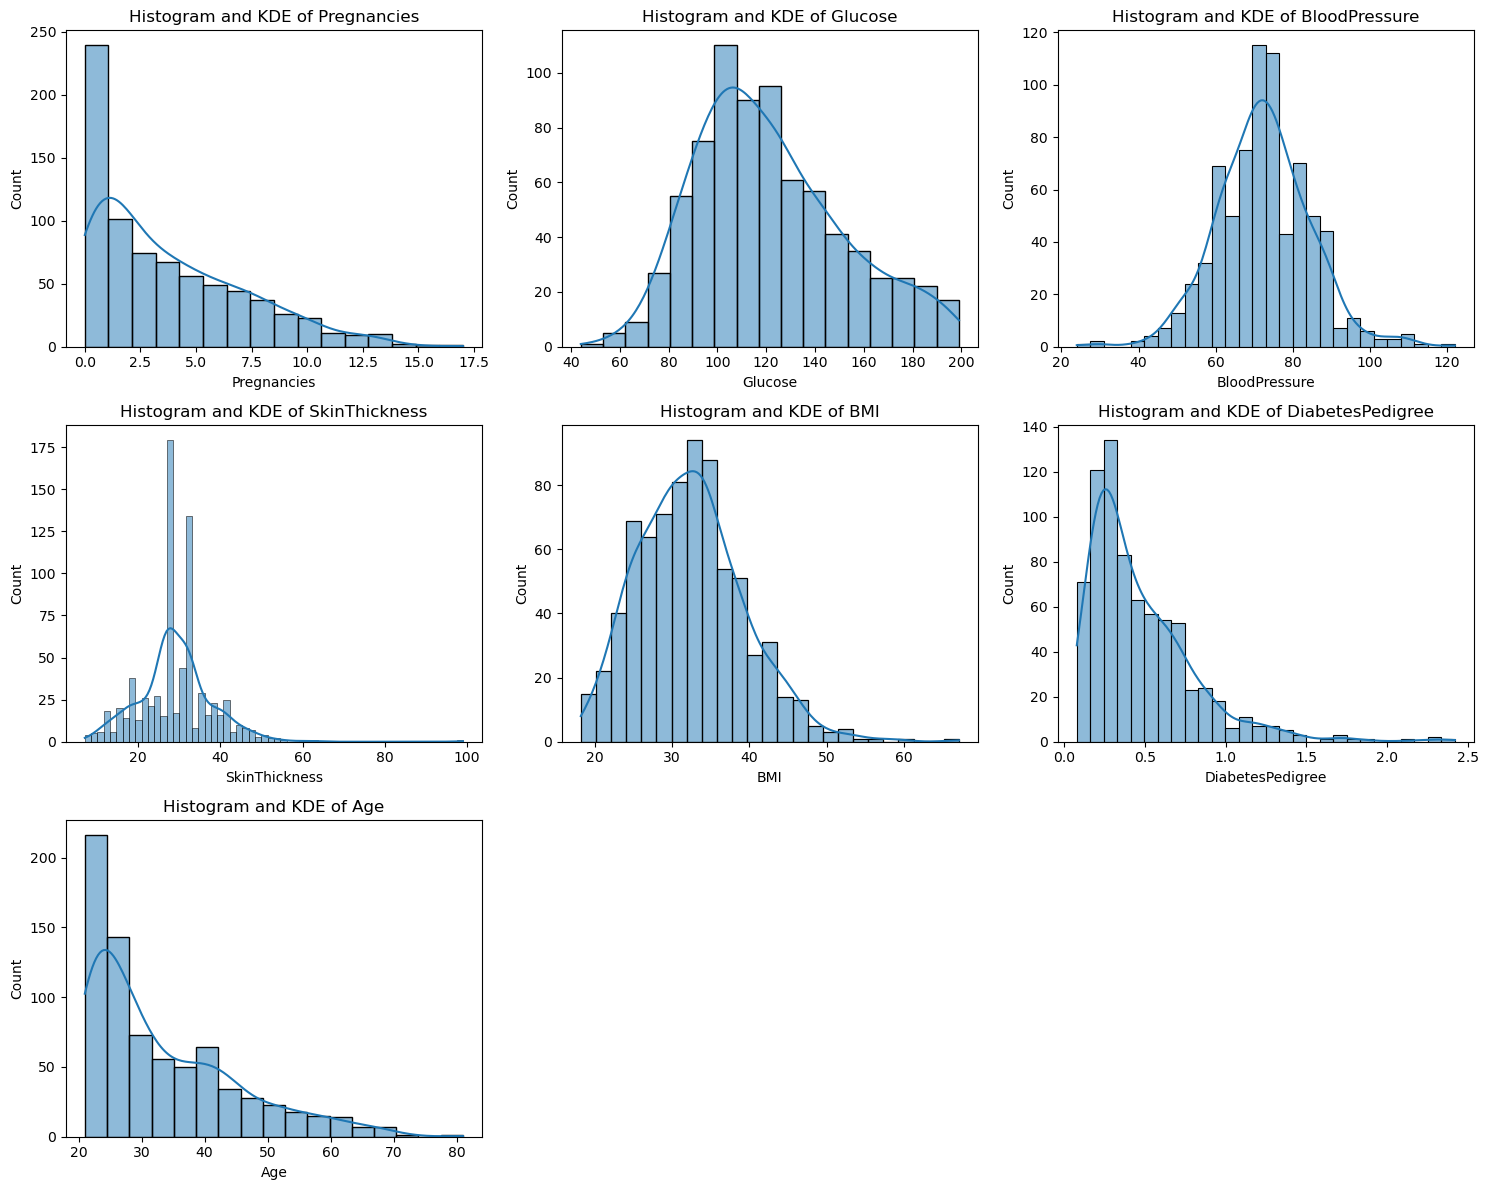

In [17]:
# HISTOGRAMS AND KDE PLOT

# Not plotting 'Outcome' column
pima_numeric = pima_copy.select_dtypes(include=['number']).iloc[:, :-1]

# subplots dynamically based on the number of numeric columns
num_plots = len(pima_numeric.columns)
num_rows = (num_plots // 3) + (num_plots % 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 4))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot histograms and kernel density plots for each column
for i, column in enumerate(pima_numeric.columns):
    sns.histplot(pima_copy[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram and KDE of {column}')

# Remove empty subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


#### Box Plots

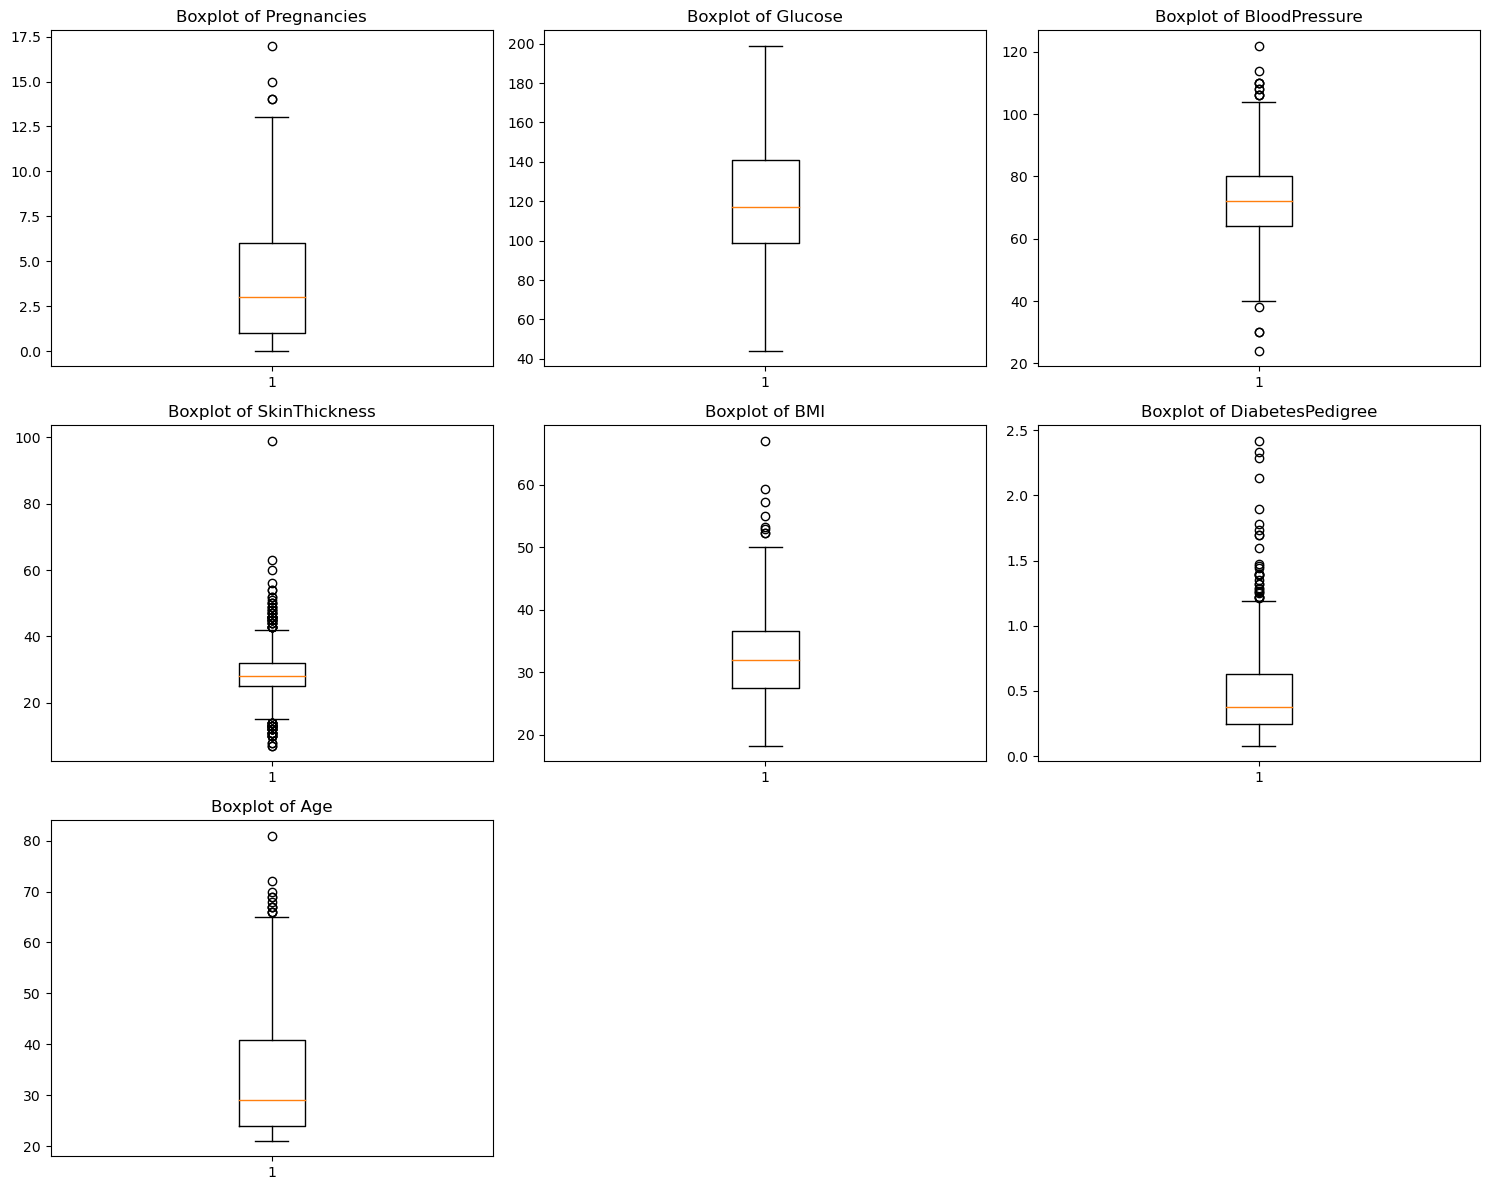

In [18]:
# Box Plot (except outcome column)
numeric_columns = pima_copy.select_dtypes(include=['number']).iloc[:, :-1]

#subplots based on the number of numeric columns
num_plots = len(numeric_columns.columns)
num_rows = (num_plots // 3) + (num_plots % 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 4))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Create boxplots and giving a title for each column
for i, column in enumerate(numeric_columns.columns):
    axes[i].boxplot(pima_copy[column])
    axes[i].set_title(f'Boxplot of {column}')

# Remove empty subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


<Axes: >

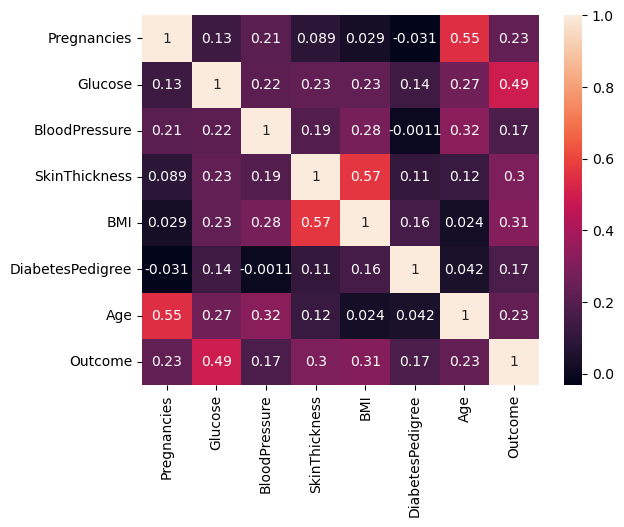

In [19]:
# copied dataset with NaN values and dropped Insulin column

#Correlation:
pima_corr= pima_copy.corr()
sns.heatmap(pima_corr,annot=True)

# Model Building

### Question - 3
#### First Model with SevenOrMorePregnancies Column

##### Adding 'SevenOrMorePregnancies' column for the question "Has the woman had 7 or more pregnanicies?"

In [20]:
# making a copy of the database to work with regression models and also add the 'SevenOrMorePregnancies' column
# and modify it.
pima_copy_sevenormorepreg = pima_copy.copy(deep=True)
pima_copy_sevenormorepreg.insert(loc = 7, column = "SevenOrMorePregnancies", value = (pima_copy_sevenormorepreg["Pregnancies"] >= 7).astype(int))
pima_copy_sevenormorepreg


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigree,Age,SevenOrMorePregnancies,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,0,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0,0
2,8,183.0,64.0,32.0,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0,0
4,0,137.0,40.0,35.0,43.1,2.288,33,0,1
...,...,...,...,...,...,...,...,...,...
745,12,100.0,84.0,33.0,30.0,0.488,46,1,0
746,1,147.0,94.0,41.0,49.3,0.358,27,0,1
747,1,81.0,74.0,41.0,46.3,1.096,32,0,0
748,3,187.0,70.0,22.0,36.4,0.408,36,0,1


#### Declaring our feature variable, target variable and splitting the data into training and test data

In [21]:
# Creating Train and Test Dataset:

X = pima_copy_sevenormorepreg['SevenOrMorePregnancies'].values
X = X.reshape(-1,1) # reshaping to a 2-D array because working with a single feature
y = pima_copy_sevenormorepreg['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21, stratify=y)

# Logistic Regression

In [22]:
# calculating class distribution to see the class balance
class_distribution = pd.Series(y).value_counts()

print("Class Distribution:")
print(class_distribution)


Class Distribution:
0    490
1    260
dtype: int64


##### as the class is imbalanced, this should be taken into consideration when making the Logistic Regression Model

In [23]:

#hyperparameter tuning

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Create a logistic regression model
logistic_model = LogisticRegression(class_weight='balanced')

# Create GridSearchCV object
kf = KFold(n_splits=5, shuffle=True, random_state=50)
grid_search = GridSearchCV(logistic_model, param_grid, cv=kf)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

print("Best Parameters:", best_params)


Best Parameters: {'C': 0.001, 'penalty': 'l2'}


/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.p

In [24]:
# Logistic Model
logistic_model = LogisticRegression(class_weight='balanced', C=0.001, penalty="l2")
logistic_model.fit(X_train, y_train)

# predictions
y_pred = logistic_model.predict(X_test)

# confusion matrix and Classification report
print("Model: Logistic Regression")
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)
classi_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classi_report)

# Accuracy:
print('MSE test: %.3f' % mean_squared_error(y_test, y_pred))
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE: ", rmse)


Model: Logistic Regression
Confusion Matrix:
[[123  24]
 [ 53  25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       147
           1       0.51      0.32      0.39        78

    accuracy                           0.66       225
   macro avg       0.60      0.58      0.58       225
weighted avg       0.63      0.66      0.63       225

MSE test: 0.342
RMSE:  0.585


#### By observing the accuracy and RMSE values, this model is a good fit for a binary classification task. The precision and recall for both classes are also acceptable, indicating that the model is able to identify both positive and negative cases relatively well.

#### =============================================================

### Probabily calculation for these 2 parts
#### (i) What is the probability that you get diabetes, given that you have had six or fewer pregnancies?
#### (ii) What is the probability that you get diabetes, given that you have seven or more pregnanices?

### Using Statsmodels module to get the intercept and Values from summary command to build the estimated model for finding probabilities.

In [25]:
X_1 = sm.add_constant(X)  # Add a constant term to the predictor

# Fit logistic regression model
logit_model = sm.Logit(y, X_1)
result = logit_model.fit()

# Print summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.616518
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  750
Model:                          Logit   Df Residuals:                      748
Method:                           MLE   Df Model:                            1
Date:                Sat, 18 Nov 2023   Pseudo R-squ.:                 0.04469
Time:                        21:25:25   Log-Likelihood:                -462.39
converged:                       True   LL-Null:                       -484.02
Covariance Type:            nonrobust   LLR p-value:                 4.791e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9199      0.092    -10.052      0.000      -1.099      -0.741
x1             1.1898      0.

#### ==============================================================

### Question - 4
#### Fitting appropriate regression models and use them to determine how likely the women whose data are listed in ToPredict.csv are to develop diabetes.

#### Logistic Regression Hyperparameter Tuning

##### column_to_drop_1

In [26]:
# choosing features for Logistic Regression model and splitting the data
column_to_drop_1 = ["Pregnancies","BMI","DiabetesPedigree","Outcome"]

X = pima_copy.drop(column_to_drop_1, axis=1)
y = pima_copy["Outcome"]

# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=15)

In [27]:
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': np.logspace(-3, 3, 7)  # Inverse of regularization strength
}

# Create a logistic regression model
logistic_model_1 = LogisticRegression(class_weight='balanced')

# Create GridSearchCV object
kf = KFold(n_splits=5, shuffle=True, random_state=69)
grid_search = GridSearchCV(logistic_model_1, param_grid, cv=kf)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# getting the best parameters
print("Best Parameters:", best_params)


Best Parameters: {'C': 0.001, 'penalty': 'l2'}


/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.p

In [28]:
# Logistic Model
logistic_model_1 = LogisticRegression(class_weight="balanced",C=0.001,penalty='l2')
logistic_model_1.fit(X_train, y_train)

# predictions
y_pred = logistic_model_1.predict(X_test)

# Accuracy:
print('Logistic Regression Model - Feature Set 1')
print('MSE test: %.3f' % mean_squared_error(y_test, y_pred))
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE: ", rmse)


Logistic Regression Model - Feature Set 1
MSE test: 0.240
RMSE:  0.49


##### column_to_drop_2

In [29]:
# choosing features for Logistic Regression model and splitting the data
column_to_drop_2 = ["Glucose","BloodPressure","SkinThickness","Age","Outcome"]

X = pima_copy.drop(column_to_drop_2, axis=1)
y = pima_copy["Outcome"]

# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=15)

In [30]:
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': np.logspace(-3, 3, 7)  # Inverse of regularization strength
}

# Create a logistic regression model
logistic_model_2 = LogisticRegression(class_weight='balanced')

# Create GridSearchCV object
kf = KFold(n_splits=5, shuffle=True, random_state=69)
grid_search = GridSearchCV(logistic_model_2, param_grid, cv=kf)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# getting the best parameters
print("Best Parameters:", best_params)


Best Parameters: {'C': 10.0, 'penalty': 'l2'}


/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.p

In [31]:
# Logistic Model
logistic_model_2 = LogisticRegression(class_weight="balanced",C=10,penalty='l2')
logistic_model_2.fit(X_train, y_train)

# predictions
y_pred = logistic_model_2.predict(X_test)

# Accuracy:
print('Logistic Regression Model - Feature Set 2')
print('MSE test: %.3f' % mean_squared_error(y_test, y_pred))
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE: ", rmse)


Logistic Regression Model - Feature Set 2
MSE test: 0.293
RMSE:  0.542


##### column_to_drop_3

In [32]:
# choosing features for Logistic Regression model and splitting the data
column_to_drop_3 = ["Age","SkinThickness","BloodPressure","Pregnancies","DiabetesPedigree","Outcome"]

X = pima_copy.drop(column_to_drop_3, axis=1)
y = pima_copy["Outcome"]

# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=15)

In [33]:
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': np.logspace(-3, 3, 7)  # Inverse of regularization strength
}

# Create a logistic regression model
logistic_model_3 = LogisticRegression(class_weight='balanced')

# Create GridSearchCV object
kf = KFold(n_splits=5, shuffle=True, random_state=69)
grid_search = GridSearchCV(logistic_model_3, param_grid, cv=kf)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# getting the best parameters
print("Best Parameters:", best_params)


Best Parameters: {'C': 0.001, 'penalty': 'l2'}


/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.p

In [34]:
# Logistic Model
logistic_model_3 = LogisticRegression(class_weight="balanced",C=0.001,penalty='l2')
logistic_model_3.fit(X_train, y_train)

# predictions
y_pred = logistic_model_3.predict(X_test)

# Accuracy
print('Logistic Regression Model - Feature Set 3')
print('MSE test: %.3f' % mean_squared_error(y_test, y_pred))
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE: ", rmse)


Logistic Regression Model - Feature Set 3
MSE test: 0.231
RMSE:  0.481


##### column_to_drop_4

In [35]:
# choosing features for Logistic Regression model and splitting the data
column_to_drop_4 = ["SkinThickness","Outcome"]
X = pima_copy.drop(column_to_drop_4, axis=1)
y = pima_copy["Outcome"]

# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=15)

In [36]:
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': np.logspace(-3, 3, 7)  # Inverse of regularization strength
}

# Create a logistic regression model
logistic_model_4 = LogisticRegression(class_weight='balanced')

# Create GridSearchCV object
kf = KFold(n_splits=5, shuffle=True, random_state=69)
grid_search = GridSearchCV(logistic_model_4, param_grid, cv=kf)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# getting the best parameters
print("Best Parameters:", best_params)


/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the 

Best Parameters: {'C': 1.0, 'penalty': 'l2'}


In [37]:
# Logistic Model
logistic_model_4 = LogisticRegression(class_weight="balanced",C=1,penalty='l2')
logistic_model_4.fit(X_train, y_train)

# predictions
y_pred = logistic_model_4.predict(X_test)

# Accuracy:
print('Logistic Regression Model - Feature Set 4')
print('MSE test: %.3f' % mean_squared_error(y_test, y_pred))
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE: ", rmse)


Logistic Regression Model - Feature Set 4
MSE test: 0.204
RMSE:  0.452


##### column_to_drop_5

In [38]:
# choosing features for Logistic Regression model and splitting the data
column_to_drop_5 = ["SkinThickness","Age","Outcome"]
X = pima_copy.drop(column_to_drop_5, axis=1)
y = pima_copy["Outcome"]

# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=15)

In [39]:
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': np.logspace(-3, 3, 7)  # Inverse of regularization strength
}

# Create a logistic regression model
logistic_model_5 = LogisticRegression(class_weight='balanced')

# Create GridSearchCV object
kf = KFold(n_splits=5, shuffle=True, random_state=69)
grid_search = GridSearchCV(logistic_model_5, param_grid, cv=kf)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# getting the best parameters
print("Best Parameters:", best_params)


Best Parameters: {'C': 1.0, 'penalty': 'l2'}


/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yadav/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.p

In [40]:
# Logistic Model
logistic_model_5 = LogisticRegression(class_weight="balanced",C=1,penalty='l2')
logistic_model_5.fit(X_train, y_train)

# predictions
y_pred = logistic_model_5.predict(X_test)

# Accuracy:
print('Logistic Regression Model - Feature Set 5')
print('MSE test: %.3f' % mean_squared_error(y_test, y_pred))
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE: ", rmse)


Logistic Regression Model - Feature Set 5
MSE test: 0.213
RMSE:  0.462


### Predicting on ToPredict.csv

In [41]:
Topredict

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,4,136,70,0,0,31.2,1.182,22
1,1,121,78,39,74,39.0,0.261,28
2,3,108,62,24,0,26.0,0.223,25
3,0,181,88,44,510,43.3,0.222,26
4,8,154,78,32,0,32.4,0.443,45


In [42]:
Topredict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       5 non-null      int64  
 1   Glucose           5 non-null      int64  
 2   BloodPressure     5 non-null      int64  
 3   SkinThickness     5 non-null      int64  
 4   Insulin           5 non-null      int64  
 5   BMI               5 non-null      float64
 6   DiabetesPedigree  5 non-null      float64
 7   Age               5 non-null      int64  
dtypes: float64(2), int64(6)
memory usage: 452.0 bytes


In [43]:
Topredict.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
count,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.200000,140.00000,75.200000,27.800000,116.800000,34.380000,0.466200,29.200000
std,3.114482,28.62691,9.757049,17.268468,222.128791,6.803822,0.410425,9.093954
min,0.000000,108.00000,62.000000,0.000000,0.000000,26.000000,0.222000,22.000000
25%,1.000000,121.00000,70.000000,24.000000,0.000000,31.200000,0.223000,25.000000
50%,3.000000,136.00000,78.000000,32.000000,0.000000,32.400000,0.261000,26.000000
75%,4.000000,154.00000,78.000000,39.000000,74.000000,39.000000,0.443000,28.000000
max,8.000000,181.00000,88.000000,44.000000,510.000000,43.300000,1.182000,45.000000


##### As there are only some missing values that are represented by 0 in Insulin and Skinthickness, as my model doesn't use those columns, not changing anything in the dataset, only replacing missing values with NaN to represent properly.


In [44]:
# making a copy of the data and  replace values
# Replacing the 0 in SkinThickness, Insulin
# columns with NaN
Topredict_copy = Topredict.copy(deep=True)
Topredict_copy[['SkinThickness','Insulin']]=Topredict_copy[['SkinThickness','Insulin']].replace(0,np.NaN)


In [45]:
#predicting the outcome with our final model

# Using the same features as in logistic_model_4
column_to_drop = ["SkinThickness","Insulin"]

X_topredict = Topredict_copy.drop(column_to_drop, axis=1)

# Make predictions
predicted_outcomes = logistic_model_4.predict(X_topredict)

# Add predictions to the Topredict dataset
Topredict_copy['Predicted_Outcome'] = predicted_outcomes

# Calculate probabilities
predicted_probabilities = logistic_model_4.predict_proba(X_topredict)

# adding them to different columns in our dataset
Topredict_copy['Probability_No_Diabetes'] = predicted_probabilities[:, 0]
Topredict_copy['Probability_Diabetes'] = predicted_probabilities[:, 1]

# Display the updated Topredict dataset
print(Topredict_copy)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      136             70            NaN      NaN  31.2   
1            1      121             78           39.0     74.0  39.0   
2            3      108             62           24.0      NaN  26.0   
3            0      181             88           44.0    510.0  43.3   
4            8      154             78           32.0      NaN  32.4   

   DiabetesPedigree  Age  Predicted_Outcome  Probability_No_Diabetes  \
0             1.182   22                  1                 0.387759   
1             0.261   28                  0                 0.581068   
2             0.223   25                  0                 0.842471   
3             0.222   26                  1                 0.116880   
4             0.443   45                  1                 0.168253   

   Probability_Diabetes  
0              0.612241  
1              0.418932  
2              0.157529  
3              0.883120  
4   

In [46]:
Topredict_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Predicted_Outcome,Probability_No_Diabetes,Probability_Diabetes
0,4,136,70,NaN,NaN,31.2,1.182,22,1,0.387759,0.612241
1,1,121,78,39.0,74.0,39.0,0.261,28,0,0.581068,0.418932
2,3,108,62,24.0,NaN,26.0,0.223,25,0,0.842471,0.157529
3,0,181,88,44.0,510.0,43.3,0.222,26,1,0.116880,0.883120
4,8,154,78,32.0,NaN,32.4,0.443,45,1,0.168253,0.831747
